# Week 1 Challenge Project
> Original author: Lyle Lalunio


**Hypothyroidism**, also called underactive thyroid or low thyroid, is a disorder of the endocrine system in which the thyroid gland does not produce enough thyroid hormone. It can cause a number of symptoms, such as poor ability to tolerate cold, a feeling of tiredness, constipation, depression, and weight gain. Occasionally, there may be swelling of the front part of the neck due to **goiter**. Untreated hypothyroidism during pregnancy can lead to delays in growth and intellectual development in the baby or cretinism.

Worldwide, too little **iodine** in the diet is the most common cause of hypothyroidism. In countries with enough iodine in the diet, the most common cause of hypothyroidism is the autoimmune condition **Hashimoto's thyroiditis**. Less common causes include previous treatment with radioactive iodine, injury to the hypothalamus or the anterior pituitary gland, certain medications, a lack of a functioning thyroid at birth, and previous thyroid surgery. The diagnosis of hypothyroidism, when suspected, can be confirmed with **blood tests** measuring thyroid-stimulating hormone (TSH) and thyroxine levels.

About one billion people around the world are estimated to be iodine deficient; however, it is unknown how often this results in hypothyroidism. In the United States, hypothyroidism occurs in nearly **5% of Americans over the age of 12**.

And that is why we iodize salt.

![thyroid-gland.png](https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Images/thyroid-gland.png)

Doctors all around the world need our help to predict whether a patient has hypothyroidism. We have already **overspent** our budget to collect such comprehensive data on about 30 attributes for 2,800 patients—a good starting number, but a larger sample would certainly be preferred. Moving forward, however, we simply cannot afford to spend so much money on data collection. Therefore, we also need to determine **which attributes are the most meaningful** to the predictive models, and cut out the rest that don't contribute much.

The boss wants to see a **balanced** model that can predict with a **high sensitivity** and **high specificity** while using a ***low amount of features***. Collecting complete data such as this is very rare, very time-consuming, and often very expensive. By minimizing the number of features, we can optimize future data collection and decide what needs to be collected and what doesn't.

## Loading the data

Let's read the data into a Pandas DataFrame and look at the first 20 records.

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Week1/allhypo.train.csv'
dataset = pd.read_csv(url)

### YOUR CODE HERE
dataset.head(20)

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,TBG Measured,TBG,Referral Source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative.|2807
5,18,F,t,f,f,f,f,f,f,f,...,t,183,t,1.3,t,141,f,?,other,negative.|3434
6,59,F,f,f,f,f,f,f,f,f,...,t,72,t,0.92,t,78,f,?,other,negative.|1595
7,80,F,f,f,f,f,f,f,f,f,...,t,80,t,0.7,t,115,f,?,SVI,negative.|1367
8,66,F,f,f,f,f,f,f,f,f,...,t,123,t,0.93,t,132,f,?,SVI,negative.|1787
9,68,M,f,f,f,f,f,f,f,f,...,t,83,t,0.89,t,93,f,?,SVI,negative.|2534


In [ ]:
test_url = 'https://github.com/MedlyticsUniversal/Data/raw/main/Week1/allhypo.test.csv'
test_data = pd.read_csv(test_url)

test_data.head(20)

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,TBG Measured,TBG,Referral Source
0,35,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,f,?,other
1,63,M,f,f,f,f,f,f,f,f,...,2.5,t,108,t,0.96,t,113,f,?,SVI
2,25,F,f,f,f,f,f,f,f,f,...,2.4,t,61,t,0.82,t,75,f,?,SVHD
3,53,F,f,f,f,f,f,f,f,t,...,2.1,t,145,t,1.03,t,141,f,?,other
4,92,F,f,f,f,f,f,f,f,f,...,1.3,t,120,t,0.84,t,143,f,?,SVI
5,67,M,f,f,f,f,f,f,f,t,...,?,t,84,t,0.83,t,101,f,?,other
6,60,F,f,f,f,f,f,f,f,f,...,2.6,t,117,t,1.31,t,90,f,?,other
7,60,F,f,f,f,f,f,f,f,f,...,1.8,t,65,t,0.99,t,66,f,?,SVI
8,48,F,f,f,f,f,f,f,f,f,...,?,t,112,t,0.92,t,121,f,?,other
9,27,F,f,f,f,f,f,f,f,f,...,2.2,t,94,t,0.89,t,106,f,?,SVI


In [ ]:
dataset.columns = ['Age', 'Sex', 'On Thyroxine', 'Query on Thyroxine', 'On Antithyroid Medication', 'Sick', 'Pregnant', 'Thyroid Surgery', 'I131 Treatment', 'Query Hypothyroid', 'Query Hyperthyroid', 'Lithium', 'Goiter', 'Tumor', 'Hypopituitary', 'Psych', 'TSH Measured', 'TSH', 'T3 Measured', 'T3', 'TT4 Measured', 'TT4', 'T4U Measured', 'T4U', 'FTI Measured', 'FTI', 'TBG Measured', 'TBG', 'Referral Source', 'Class']

Great, looks like the data loaded in properly. Let's continue looking at some summary statistics on our data.

## Viewing summary statistics
The functions `describe()` and `info()` are your friends.

In [ ]:
# Output high-level column statistics
dataset.describe()

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,TBG Measured,TBG,Referral Source,Class
count,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,...,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800
unique,94,3,2,2,2,2,2,2,2,2,...,2,218,2,139,2,210,1,1,5,2800
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,negative.|3733
freq,75,1830,2470,2760,2766,2690,2759,2761,2752,2637,...,2616,184,2503,297,2505,295,2800,2800,1632,1


In [ ]:
# Output information about the data including the index dtype and column dtypes, non-null values and memory usage
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        2800 non-null   object
 1   Sex                        2800 non-null   object
 2   On Thyroxine               2800 non-null   object
 3   Query on Thyroxine         2800 non-null   object
 4   On Antithyroid Medication  2800 non-null   object
 5   Sick                       2800 non-null   object
 6   Pregnant                   2800 non-null   object
 7   Thyroid Surgery            2800 non-null   object
 8   I131 Treatment             2800 non-null   object
 9   Query Hypothyroid          2800 non-null   object
 10  Query Hyperthyroid         2800 non-null   object
 11  Lithium                    2800 non-null   object
 12  Goiter                     2800 non-null   object
 13  Tumor                      2800 non-null   object
 14  Hypopitu

Note the data types are all objects—even columns that are obviously numeric like `Age`. This is because there are "?" values for some of the cells, making Pandas interpret these columns as `non-null` objects (instead of `int`, for example).

## Data cleaning

To start, let's make all the **numerical columns** contain the correct type of values and change the dtype of those columns to `numeric`. Let's also replace all those **question marks** with `np.nan`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Convert "?" cells to NaN
dataset.replace('?', np.nan, inplace=True)

# Identify columns by what time of data they hold
numeric_columns = ['Age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

# Categorical columns are everything else (minus 'Class')
categorical_columns = list(set(dataset.columns) - set(numeric_columns)-set(['Class']))

In [ ]:
dataset[numeric_columns] = dataset[numeric_columns].apply(pd.to_numeric)
test_data[numeric_columns] = test_data[numeric_columns].apply(pd.to_numeric)

In [ ]:
# Print statement for sanity check
print('Numerical Columns:', numeric_columns)
print('Categorical Columns:',categorical_columns)

dataset.head(10)

Numerical Columns: ['Age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
Categorical Columns: ['Thyroid Surgery', 'Goiter', 'On Antithyroid Medication', 'Query Hypothyroid', 'TBG Measured', 'Referral Source', 'Tumor', 'Lithium', 'TBG', 'On Thyroxine', 'Query Hyperthyroid', 'Query on Thyroxine', 'FTI Measured', 'Pregnant', 'TT4 Measured', 'I131 Treatment', 'Psych', 'Hypopituitary', 'Sex', 'T3 Measured', 'Sick', 'T4U Measured', 'TSH Measured']


,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,TBG Measured,TBG,Referral Source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative.|3733
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,negative.|1442
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,negative.|2965
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,negative.|806
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative.|2807
5,18.0,F,t,f,f,f,f,f,f,f,...,t,183.0,t,1.30,t,141.0,f,NaN,other,negative.|3434
6,59.0,F,f,f,f,f,f,f,f,f,...,t,72.0,t,0.92,t,78.0,f,NaN,other,negative.|1595
7,80.0,F,f,f,f,f,f,f,f,f,...,t,80.0,t,0.70,t,115.0,f,NaN,SVI,negative.|1367
8,66.0,F,f,f,f,f,f,f,f,f,...,t,123.0,t,0.93,t,132.0,f,NaN,SVI,negative.|1787
9,68.0,M,f,f,f,f,f,f,f,f,...,t,83.0,t,0.89,t,93.0,f,NaN,SVI,negative.|2534


Hmm, still looks like the `TBG` column is unfilled, implying it was empty to begin with. Let's get rid of this column then (and make sure to get rid of it in your list of numeric columns too!)

In [ ]:
### YOUR CODE HERE
drop_cols = ['TBG', 'TBG Measured']
try:
  for drop_col in drop_cols:
    categorical_columns.remove(drop_col)
  dataset = dataset.drop(drop_cols[0], axis=1)
  dataset = dataset.drop(drop_cols[1], axis=1)
except:
  pass

In [ ]:
# Print statement for sanity check
print('Numerical Columns:', numeric_columns)
print('Categorical Columns:',categorical_columns)

dataset.head(10)

Numerical Columns: ['Age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
Categorical Columns: ['Thyroid Surgery', 'Goiter', 'On Antithyroid Medication', 'Query Hypothyroid', 'Referral Source', 'Tumor', 'Lithium', 'On Thyroxine', 'Query Hyperthyroid', 'Query on Thyroxine', 'FTI Measured', 'Pregnant', 'TT4 Measured', 'I131 Treatment', 'Psych', 'Hypopituitary', 'Sex', 'T3 Measured', 'Sick', 'T4U Measured', 'TSH Measured']


,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,Referral Source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,2.5,t,125.0,t,1.14,t,109.0,SVHC,negative.|3733
1,23.0,F,f,f,f,f,f,f,f,f,...,t,2.0,t,102.0,f,NaN,f,NaN,other,negative.|1442
2,46.0,M,f,f,f,f,f,f,f,f,...,f,NaN,t,109.0,t,0.91,t,120.0,other,negative.|2965
3,70.0,F,t,f,f,f,f,f,f,f,...,t,1.9,t,175.0,f,NaN,f,NaN,other,negative.|806
4,70.0,F,f,f,f,f,f,f,f,f,...,t,1.2,t,61.0,t,0.87,t,70.0,SVI,negative.|2807
5,18.0,F,t,f,f,f,f,f,f,f,...,f,NaN,t,183.0,t,1.30,t,141.0,other,negative.|3434
6,59.0,F,f,f,f,f,f,f,f,f,...,f,NaN,t,72.0,t,0.92,t,78.0,other,negative.|1595
7,80.0,F,f,f,f,f,f,f,f,f,...,t,0.6,t,80.0,t,0.70,t,115.0,SVI,negative.|1367
8,66.0,F,f,f,f,f,f,f,f,f,...,t,2.2,t,123.0,t,0.93,t,132.0,SVI,negative.|1787
9,68.0,M,f,f,f,f,f,f,f,f,...,t,1.6,t,83.0,t,0.89,t,93.0,SVI,negative.|2534


All right, let's take a look now at the info of *just the numeric columns* in the dataset:

In [ ]:
### YOUR CODE HERE
dataset[numeric_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     2799 non-null   float64
 1   TSH     2516 non-null   float64
 2   T3      2215 non-null   float64
 3   TT4     2616 non-null   float64
 4   T4U     2503 non-null   float64
 5   FTI     2505 non-null   float64
dtypes: float64(6)
memory usage: 131.4 KB


Perfect, now let's move onto fixing that `Class` feature. According to the note the data collectors included with this data, the `".|####"` refers to a patient number and is not necessarily relevant for our purposes here.

Here's code we've already written up using regular expressions:

In [ ]:
# Import regular expression package
import re

# Define the regular expression for the ".|####" part of dataset['class']

regex_pattern = ( "\."   # looks for the period...
                  "\|"   # followed by a pipe...
                  "\d+") # followed by one or more digit

for index, row in dataset.iterrows():

    # Substitute instances of our regex_pattern for an empty string
    new_class = re.sub(regex_pattern, '', row['Class'])
    dataset.loc[index,'Class']=new_class

dataset.head()

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,Referral Source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,2.5,t,125.0,t,1.14,t,109.0,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,2.0,t,102.0,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,f,NaN,t,109.0,t,0.91,t,120.0,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,1.9,t,175.0,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,1.2,t,61.0,t,0.87,t,70.0,SVI,negative


In [ ]:
DeepnoteChart(dataset, """{"mark":{"type":"bar","tooltip":true},"width":"container","config":{"customFormatTypes":true},"height":"container","$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{"x":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}},"y":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}}},"usermeta":{"tooltipDefaultMode":true}}""")

Let's run the `describe()` function on just the `"Class"` column.

In [ ]:
### YOUR CODE HERE
dataset['Class'].describe()

count         2800
unique           4
top       negative
freq          2580
Name: Class, dtype: object

It looks like there are 4 unique classification values!

Display all the unique values in the `Class` column.

In [ ]:
### YOUR CODE HERE
dataset['Class'].unique()

array(['negative', 'compensated hypothyroid', 'primary hypothyroid',
       'secondary hypothyroid'], dtype=object)

Let's make this response variable **binary** for now. If you finish this classification task early, try the **multiclass** classifier with all 4 values!

In [ ]:
# Change all non-negative classes to the positive class
### YOUR CODE HERE
dataset['Class'] = dataset['Class'].replace('negative', 0)
dataset['Class'] = dataset['Class'].replace('compensated hypothyroid', 1)
dataset['Class'] = dataset['Class'].replace('primary hypothyroid', 1)
dataset['Class'] = dataset['Class'].replace('secondary hypothyroid', 1)

dataset.head(20)

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,Referral Source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,2.5,t,125.0,t,1.14,t,109.0,SVHC,0
1,23.0,F,f,f,f,f,f,f,f,f,...,t,2.0,t,102.0,f,NaN,f,NaN,other,0
2,46.0,M,f,f,f,f,f,f,f,f,...,f,NaN,t,109.0,t,0.91,t,120.0,other,0
3,70.0,F,t,f,f,f,f,f,f,f,...,t,1.9,t,175.0,f,NaN,f,NaN,other,0
4,70.0,F,f,f,f,f,f,f,f,f,...,t,1.2,t,61.0,t,0.87,t,70.0,SVI,0
5,18.0,F,t,f,f,f,f,f,f,f,...,f,NaN,t,183.0,t,1.30,t,141.0,other,0
6,59.0,F,f,f,f,f,f,f,f,f,...,f,NaN,t,72.0,t,0.92,t,78.0,other,0
7,80.0,F,f,f,f,f,f,f,f,f,...,t,0.6,t,80.0,t,0.70,t,115.0,SVI,0
8,66.0,F,f,f,f,f,f,f,f,f,...,t,2.2,t,123.0,t,0.93,t,132.0,SVI,0
9,68.0,M,f,f,f,f,f,f,f,f,...,t,1.6,t,83.0,t,0.89,t,93.0,SVI,0


Before we move on, let's not forget to run the `describe()` function on just your categorical columns too.
Compare it to the `describe()` that your numeric columns produce.

In [ ]:
### YOUR CODE HERE
dataset[categorical_columns].describe()

,Thyroid Surgery,Goiter,On Antithyroid Medication,Query Hypothyroid,Referral Source,Tumor,Lithium,On Thyroxine,Query Hyperthyroid,Query on Thyroxine,...,Pregnant,TT4 Measured,I131 Treatment,Psych,Hypopituitary,Sex,T3 Measured,Sick,T4U Measured,TSH Measured
count,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,...,2800,2800,2800,2800,2800,2690,2800,2800,2800,2800
unique,2,2,2,2,5,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,f,f,f,f,other,f,f,f,f,f,...,f,t,f,f,f,F,t,f,t,t
freq,2761,2775,2766,2637,1632,2729,2786,2470,2627,2760,...,2759,2616,2752,2665,2799,1830,2215,2690,2503,2516


In [ ]:
dataset[numeric_columns].describe()

,Age,TSH,T3,TT4,T4U,FTI
count,2799.00000,2516.000000,2215.000000,2616.000000,2503.000000,2505.000000
mean,51.84423,4.672150,2.024966,109.072401,0.997912,110.787984
std,20.46116,21.449453,0.824600,35.392443,0.194390,32.883986
min,1.00000,0.005000,0.050000,2.000000,0.310000,2.000000
25%,36.00000,0.440000,1.600000,88.000000,0.880000,93.000000
50%,54.00000,1.400000,2.000000,104.000000,0.980000,107.000000
75%,67.00000,2.600000,2.400000,125.000000,1.080000,124.000000
max,455.00000,478.000000,10.600000,430.000000,2.120000,395.000000


Great! Let's see if there're any other records we have to address. Calling `count()` on the dataset is a nice way to check if we have any other missing values.

In [ ]:
### YOUR CODE HERE
dataset.count()

Age                          2799
Sex                          2690
On Thyroxine                 2800
Query on Thyroxine           2800
On Antithyroid Medication    2800
Sick                         2800
Pregnant                     2800
Thyroid Surgery              2800
I131 Treatment               2800
Query Hypothyroid            2800
Query Hyperthyroid           2800
Lithium                      2800
Goiter                       2800
Tumor                        2800
Hypopituitary                2800
Psych                        2800
TSH Measured                 2800
TSH                          2516
T3 Measured                  2800
T3                           2215
TT4 Measured                 2800
TT4                          2616
T4U Measured                 2800
T4U                          2503
FTI Measured                 2800
FTI                          2505
Referral Source              2800
Class                        2800
dtype: int64

There seems to be quite a few rows with missing data. There are techniques you can use to try to handle this situation (and some models in `sklearn` can handle NaN values without a problem). But let's just remove those rows for now.

In [ ]:
### YOUR CODE HERE
dataset = dataset.dropna(axis=0).reset_index(drop=True)

**Ooof!**

We just cut out about **30%** of our dataset! You probably won't want to throw out this data for your project, but let's keep going now that we have a clean dataset and do some further data analysis and visualization to better understand what we're working with.

## Data analysis and visualization

Let's check the correlation in the dataset.

The function [**`pandas.corr()`**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) will compute pairwise correlation of numerical columns, excluding NA/null values. Notice that in this case, since we've converted `Class` to a number (0 or 1), we can see how correlated different features are with the class label!

In [ ]:
### YOUR CODE HER
dataset['Sex'] = dataset['Sex'].replace(to_replace="M", value=1)
dataset['Sex'] = dataset['Sex'].replace(to_replace="F", value=0)
for i in categorical_columns:
    dataset[i] = dataset[i].replace(to_replace="t", value=1)
    dataset[i] = dataset[i].replace(to_replace="f", value=0)

### YOUR CODE HER
test_data['Sex'] = test_data['Sex'].replace(to_replace="M", value=1)
test_data['Sex'] = test_data['Sex'].replace(to_replace="F", value=0)
for i in categorical_columns:
    test_data[i] = test_data[i].replace(to_replace="t", value=1)
    test_data[i] = test_data[i].replace(to_replace="f", value=0)

In [ ]:
dataset['Referral Source'].unique()
dataset['Referral Source'] = dataset['Referral Source'].replace('SVHC', 0)
dataset['Referral Source'] = dataset['Referral Source'].replace('SVI', 1)
dataset['Referral Source'] = dataset['Referral Source'].replace('STMW', 2)
dataset['Referral Source'] = dataset['Referral Source'].replace('SVHD', 3)
dataset['Referral Source'] = dataset['Referral Source'].replace('other', 4)
dataset.head(20)

test_data['Referral Source'] = test_data['Referral Source'].replace('SVHC', 0)
test_data['Referral Source'] = test_data['Referral Source'].replace('SVI', 1)
test_data['Referral Source'] = test_data['Referral Source'].replace('STMW', 2)
test_data['Referral Source'] = test_data['Referral Source'].replace('SVHD', 3)
test_data['Referral Source'] = test_data['Referral Source'].replace('other', 4)
test_data.head()

,Age,FTI,On Thyroxine,Pregnant,Query Hypothyroid,Referral Source,Sex,T3,TSH,TT4
0,35,106.0,0,0,0,4,0.0,NaN,NaN,NaN
1,63,113,0,0,0,1,1.0,2.5,3.5,108
2,25,75,0,0,0,3,0.0,2.4,4.6,61
3,53,141,0,0,1,4,0.0,2.1,0.25,145
4,92,143,0,0,0,1,0.0,1.3,0.7,120


Let's do some visual analysis using a new module called `seaborn`. Explore its incredible versatility and diversity with data visualization here: https://seaborn.pydata.org/.

In [ ]:
#import seaborn as sns
#sns.pairplot(dataset)

Let's now see the final summary statistics for our (numerical) data using `describe()`.

In [ ]:
### YOUR CODE HERE
dataset[numeric_columns].describe()

,Age,TSH,T3,TT4,T4U,FTI
count,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000
mean,53.216230,4.376097,2.014895,108.760452,0.998692,110.001695
std,20.882261,18.427724,0.824728,35.447159,0.199024,32.386662
min,1.000000,0.005000,0.050000,2.000000,0.310000,2.000000
25%,37.000000,0.450000,1.600000,88.000000,0.880000,93.000000
50%,55.000000,1.300000,2.000000,104.000000,0.980000,107.000000
75%,69.000000,2.500000,2.400000,124.000000,1.090000,123.000000
max,455.000000,468.000000,10.600000,430.000000,2.120000,395.000000


Now let's take a look at our categorical columns! Try `pandas.unique()` or `pandas.value_counts(dropna=False)`.

In [ ]:
for col in categorical_columns:
    print(col, dataset[col].unique())

print(dataset['Class'].unique())

Thyroid Surgery [0 1]
Goiter [0 1]
On Antithyroid Medication [0 1]
Query Hypothyroid [0 1]
Referral Source [0 1 4 3 2]
Tumor [0 1]
Lithium [0 1]
On Thyroxine [0 1]
Query Hyperthyroid [0 1]
Query on Thyroxine [0 1]
FTI Measured [1]
Pregnant [0 1]
TT4 Measured [1]
I131 Treatment [0 1]
Psych [0 1]
Hypopituitary [0 1]
Sex [0 1]
T3 Measured [1]
Sick [0 1]
T4U Measured [1]
TSH Measured [1]
[0 1]


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

old_data = dataset[numeric_columns]
selector = SelectKBest(score_func=chi2, k=5)
new_data = selector.fit_transform(old_data, dataset['Class'])

selected_indices = np.argsort(selector.scores_)[::-1][:5]
numeric_columns = np.array(numeric_columns)[selected_indices]
selected_features = numeric_columns

print("Selected features:", selected_features, selector.scores_[selected_indices])

Selected features: ['TSH' 'FTI' 'TT4' 'T3' 'Age'] [3.34510521e+04 1.94346497e+03 1.87252577e+03 2.20271577e+01
 1.24691789e-01]


In [ ]:
print(numeric_columns)

['TSH' 'FTI' 'TT4' 'T3' 'Age']


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

old_data = dataset[categorical_columns]
selector = SelectKBest(score_func=chi2, k=5)
new_data = selector.fit_transform(old_data, dataset['Class'])

selected_indices = np.argsort(selector.scores_)[::-1][:5]
categorical_columns = np.array(categorical_columns)[selected_indices]
selected_features = np.concatenate([selected_features, categorical_columns])

selected_features = np.concatenate([np.unique(selected_features), ['Class']])
print(len(selected_features), selected_features)

# print(selected_indices, categorical_columns)

[ 7  3 16  4 11] ['On Thyroxine' 'Query Hypothyroid' 'Sex' 'Referral Source' 'Pregnant']
11 ['Age' 'FTI' 'On Thyroxine' 'Pregnant' 'Query Hypothyroid'
 'Referral Source' 'Sex' 'T3' 'TSH' 'TT4' 'Class']


In [ ]:
#from sklearn.feature_selection import SelectKBest, chi2

#all_columns = np.concatenate([np.array(numeric_columns), np.array(categorical_columns)])
#old_data = dataset[all_columns]
#print(old_data.shape)
#selector = SelectKBest(score_func=chi2, k=10)
#new_data = selector.fit_transform(old_data, dataset['Class'])

#selected_indices = np.argsort(selector.scores_)[::-1][:10]
#selected_features = all_columns[selected_indices]
#selected_features = np.concatenate([np.unique(selected_features), ['Class']])
#print(len(selected_features), selected_indices, selected_features, selector.scores_[selected_indices])

In [ ]:
dataset = dataset[selected_features]
test_data = test_data[np.delete(selected_features, -1)]
dataset.describe()
test_data

,Age,FTI,On Thyroxine,Pregnant,Query Hypothyroid,Referral Source,Sex,T3,TSH,TT4
0,35,?,f,f,f,other,F,?,?,?
1,63,113,f,f,f,SVI,M,2.5,3.5,108
2,25,75,f,f,f,SVHD,F,2.4,4.6,61
3,53,141,f,f,t,other,F,2.1,0.25,145
4,92,143,f,f,f,SVI,F,1.3,0.7,120
...,...,...,...,...,...,...,...,...,...,...
967,30,?,f,f,f,other,F,?,?,?
968,68,114,f,f,f,SVI,F,2.1,1,124
969,74,105,f,f,f,other,F,1.8,5.1,112
970,72,87,f,f,f,SVI,M,2,0.7,82


In [ ]:
#test_['Class'] = dataset['Class'].replace('compensated hypothyroid', 1)
# hello

test_data.replace('?', np.nan, inplace=True)

for i in np.delete(selected_features, -1):
    test_data[i].fillna(test_data[i].median(), inplace=True) #use data[i].median() for median

test_data

,Age,FTI,On Thyroxine,Pregnant,Query Hypothyroid,Referral Source,Sex,T3,TSH,TT4
0,35,106.0,0,0,0,4,0.0,2.0,1.30,103.0
1,63,113.0,0,0,0,1,1.0,2.5,3.50,108.0
2,25,75.0,0,0,0,3,0.0,2.4,4.60,61.0
3,53,141.0,0,0,1,4,0.0,2.1,0.25,145.0
4,92,143.0,0,0,0,1,0.0,1.3,0.70,120.0
...,...,...,...,...,...,...,...,...,...,...
967,30,106.0,0,0,0,4,0.0,2.0,1.30,103.0
968,68,114.0,0,0,0,1,0.0,2.1,1.00,124.0
969,74,105.0,0,0,0,4,0.0,1.8,5.10,112.0
970,72,87.0,0,0,0,1,1.0,2.0,0.70,82.0


Uh oh . . . We have several features that are non-informative (they only have a single value). We probably didn't notice this before because there were still `'?'` values in there, or perhaps when we threw out that 30% of our data, we got rid of some variation in these features. Let's just drop those columns.

Remember to remove these columns from your list of categorial columns.

In [ ]:
# Drop columns that do not contain useful information (all 2800 data points have the same value)
### YOUR CODE HERE
#for col in categorical_columns:
#    print(col, dataset[col].unique())
#print(dataset['Class'].unique())

We can convert categorical columns (i.e., True/False or Male/Female) into indicator values (0, 1) using a pretty nifty function: [pandas.get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html).  

In [ ]:
# Convert categorical columns to indicator (0, 1) variables
### YOUR CODE HERE

OK! I think we're ready to create and select some supervised learning models. To get the ball rolling, let's select `Age` and `Sex` as our explanatory features (and `Class` as the target feature, obviously).

We will split our data into training and testing sets in an **80-20** split, stratified by class distribution (`stratify=dataset['Class']`; this tries to keep the class distribution approximately equal for the training and test set). For consistency, let's use a random state of 0 (`random_state=0`).

In [ ]:
from sklearn.model_selection import train_test_split

### YOUR CODE HERE
X = dataset.iloc[:, :-1]
y = dataset['Class']
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=dataset['Class'], random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(1947, 10) (1947,)
(1541, 10) (1541,)
(16, 10) (16,)
(390, 10) (390,)


In [ ]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from collections import Counter
# Concatenate train and validation sets

X_comb = np.concatenate((X_train,X_val))
y_comb = np.concatenate((y_train,y_val))

# Define your predefined split i.e. -1 indicates a training sample and a 0 indicates a validation sample
val_fold = [-1]*len(X_train)
val_fold.extend([0]*len(X_val))
# print(val_fold)
print(Counter(val_fold))

ps = PredefinedSplit(val_fold)

Counter({-1: 1541, 0: 16})


## Model evaluation

### Confusion matrix
![confusion_matrix2.png](https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Images/confusion_matrix2.png)

Create a confusion matrix using the predictions of the decision tree model you built earlier.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def cm_metric(y_true,y_val_predict):
    cm = confusion_matrix(y_true, y_val_predict)

    print("Confusion Matrix:")
    print(cm)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')

### Area under ROC curve

Yet another appropriate metric is the **Area Under the Receiver Operating Characteristic curve**. Specifically, the diagnostic performance of a test, or the accuracy of a test to discriminate diseased cases from normal cases, is evaluated using **Receiver Operating Characteristic** (ROC) curve analysis.

When you consider the results of a particular test in two populations, one population with a disease and the other without the disease, you will rarely observe a perfect separation between the two groups. Hence, there exists an overlap as in the diagram below (which creates **false negatives** and **false positives**).

![roc_overlap.png](https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Images/roc_overlap.png)

In a Receiver Operating Characteristic (ROC) curve, the **true positive rate** (sensitivity; $\frac {TP} {TP+FN}$) is plotted against the **false positive rate** (1 - specificity; $\frac {TN} {TN+FP}$) for different cutoff points. Each point on the ROC curve represents a TPR/FPR pair corresponding to a particular decision threshold. A test with perfect discrimination (no overlap in the two distributions) has an ROC curve that passes through the upper left corner (100% TPR, 100% FPR). Therefore, the closer the ROC curve is to the *upper-left* corner, the higher the overall accuracy of the test.

![tpr_vs_fpr.png](https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Images/tpr_vs_fpr.png)

Now, let's calculate the area under the ROC curve with your predictions. Here, we will need the predicted probabilities of choosing a specific class value (`y_val_proba`) rather than the class value (`y_val_predict`) itself.

Now graph the ROC curve, fully labeled, using Matplotlib.

In conclusion, it looks like this model performed pretty badly. Not unexpected, though, since we're only using 2 features! Looking on the bright side, there's a lot of room for improvement!  Try using more features and different models, and see if you can do anything about that 30% of the data we threw out earlier.

### Zero Rule

To start, let's establish the baseline performance. This is important because it provides a starting point of comparison for later evaluation methods, like accuracy.

A good baseline model to use is the **Zero Rule algorithm**. In classification problems, it simply predicts the class value with the greatest number of instances each time.

In [ ]:
def zero_rule_algorithm_classification(y_train, y_test):
    majority_class = Counter(y_train).most_common(1)[0][0]
    y_pred = np.full_like(y_test, fill_value=majority_class)

    return y_pred

Get your baseline performance by calculating the accuracy of your Zero Rule algorithm.

test acc: 92.05128205128204
test f1 score: 0.0
Confusion Matrix:
[[359   0]
 [ 31   0]]


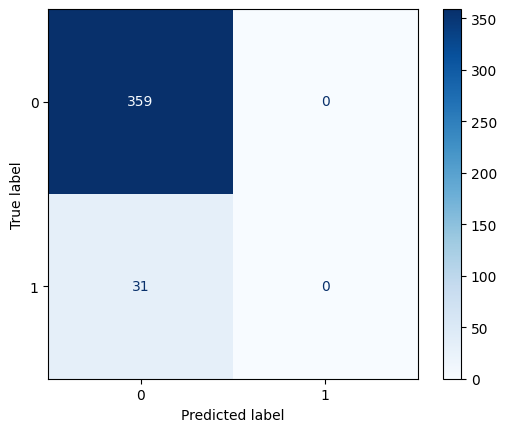

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
y_test_pred=zero_rule_algorithm_classification(y_train, y_test)
print("test acc: " + str(accuracy_score(y_test, y_test_pred)*100))
print("test f1 score: " + str(f1_score(y_test, y_test_pred)))
cm_metric(y_test, y_test_pred)

Hm, so maybe accuracy isn't the best performance measure for this dataset. As you've seen already, even when the models predict "negative" for all the records, we could already achieve a ~92% accuracy. Using such a model, however, would imply that we incorrectly predict all cases to be positive, which in the context of this problem is fatal.

Thankfully, accuracy isn't the only way to evaluate your model. Let's take a look at a **confusion matrix**.

## Model training and selection

Let's train a **decision tree** model on our training data!

In [ ]:
from sklearn.metrics import auc, accuracy_score, recall_score, precision_score, f1_score

scores = {}

def add_scores(scores_dict, name, y_truth, y_hat):
    acc = accuracy_score(y_truth, y_hat)
    recall = recall_score(y_truth, y_hat)
    precision = precision_score(y_truth, y_hat)
    f1 = f1_score(y_truth, y_hat)

    scores_dict[name] = [acc, recall, precision, f1]

{'Decision Tree': [0.9923076923076923, 1.0, 0.9117647058823529, 0.9538461538461539]}
val acc: 100.0
val f1 score: 1.0
test acc: 99.23076923076923
test f1 score: 0.9538461538461539
Confusion Matrix:
[[356   3]
 [  0  31]]


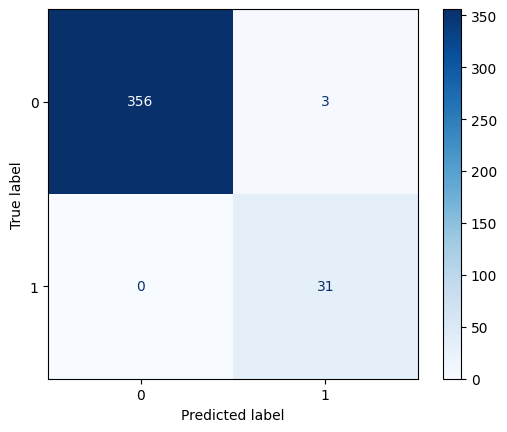

In [ ]:
# DECISION TREE

from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state=42, max_depth = 5)
decision_tree.fit(X_train, y_train)

y_val_pred=decision_tree.predict(X_val)
y_test_pred=decision_tree.predict(X_test)

add_scores(scores, "Decision Tree", y_test, y_test_pred)
print(scores)

print("val acc: " + str(accuracy_score(y_val, y_val_pred)*100))
print("val f1 score: " + str(f1_score(y_val, y_val_pred)))
print("test acc: " + str(accuracy_score(y_test, y_test_pred)*100))
print("test f1 score: " + str(f1_score(y_test, y_test_pred)))
cm_metric(y_test, y_test_pred)

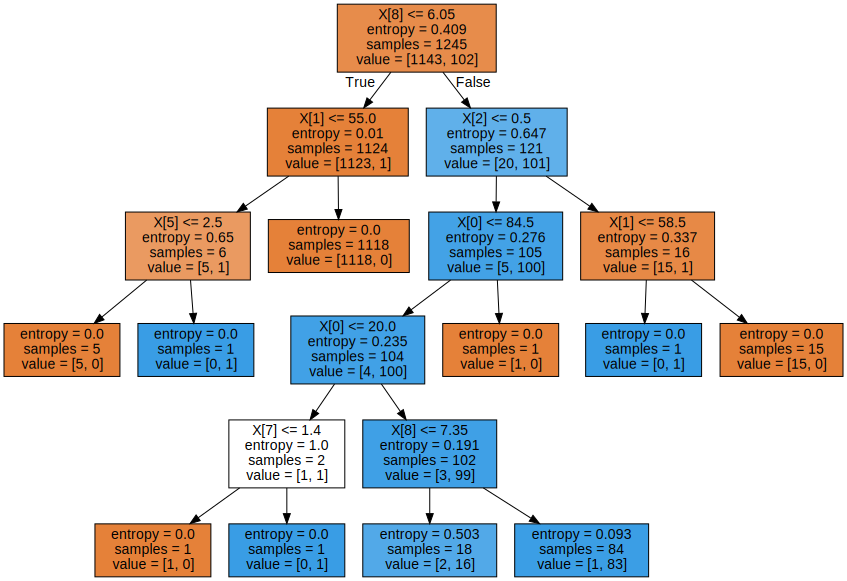

In [ ]:
# VISUALIZE DECISION TREE

from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(decision_tree, out_file=None, filled=True)

graph = graphviz.Source(dot_data)
graph

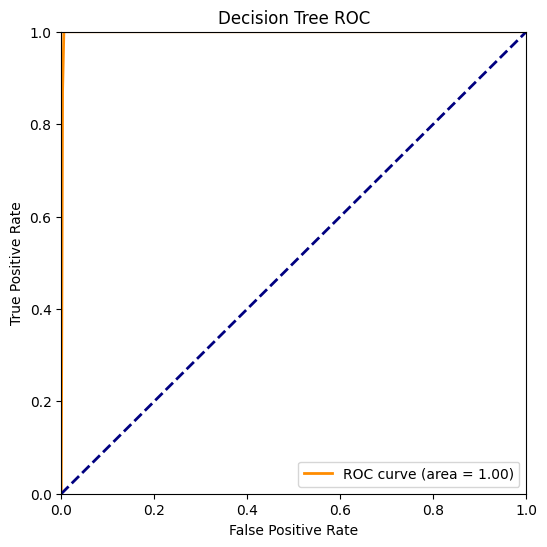

In [ ]:
from sklearn import metrics

### YOUR CODE HERE
y_test_proba = decision_tree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_proba)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt

### YOUR CODE HERE
plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC')
plt.legend(loc="lower right")
plt.show()

[0.9743589743589743, 0.9871794871794872, 0.9897435897435898, 0.9923076923076923, 0.9897435897435898, 0.9897435897435898, 0.9897435897435898, 0.9923076923076923, 0.9897435897435898, 0.9897435897435898]
[0.9807692307692307, 0.9903846153846154, 0.9903846153846154, 0.9871794871794872, 0.9903846153846154, 0.9903846153846154, 0.9903846153846154, 0.9903846153846154, 0.9903846153846154, 0.9903846153846154]
[0.8611111111111112, 0.923076923076923, 0.9374999999999999, 0.9523809523809523, 0.9374999999999999, 0.9374999999999999, 0.9374999999999999, 0.9538461538461539, 0.9374999999999999, 0.9374999999999999]


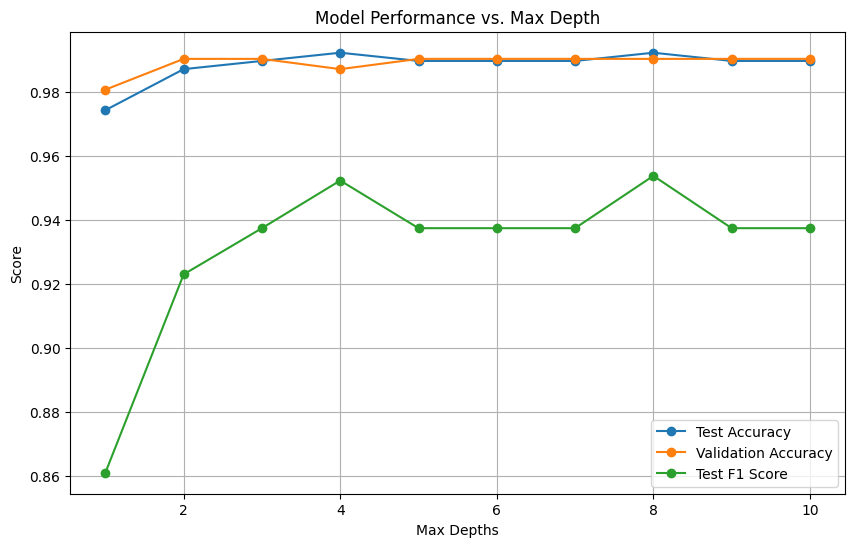

In [ ]:
test_accs = []
val_accs = []
f1s = []
max_depths = [1,2,3,4,5,6,7,8,9,10]

for k in range(1,11):
    decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth=k)
    decision_tree.fit(X_train, y_train)
    y_val_pred=decision_tree.predict(X_val)
    y_test_pred=decision_tree.predict(X_test)
    val_accs.append(accuracy_score(y_val, y_val_pred))
    test_accs.append(accuracy_score(y_test, y_test_pred))
    f1s.append(f1_score(y_test, y_test_pred))
    # print("val acc: " + str(accuracy_score(y_val, y_val_pred)*100))
    # print("val f1 score: " + str(f1_score(y_val, y_val_pred)))
    # print("test acc: " + str(accuracy_score(y_test, y_test_pred)*100))
    # print("test f1 score: " + str(f1_score(y_test, y_test_pred)))

print(test_accs)
print(val_accs)
print(f1s)


plt.figure(figsize=(10, 6))
plt.plot(max_depths, test_accs, label='Test Accuracy', marker='o')
plt.plot(max_depths, val_accs, label='Validation Accuracy', marker='o')
plt.plot(max_depths, f1s, label='Test F1 Score', marker='o')


plt.xlabel('Max Depths')
plt.ylabel('Score')
plt.title('Model Performance vs. Max Depth')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
tree = DecisionTreeClassifier(criterion = 'entropy',random_state =42)

param_grid = {
    'min_samples_leaf': [1, 3,4,5,6,7, 8, 9, 10, 20, 50],
    'max_depth': [1, 2, 3, 4, 5, 11, 12, 10, 20, 50]
}
#randomsearch instead of grid
cv_tree = GridSearchCV(estimator = tree,
                                  param_grid = param_grid,
                                  cv = ps)
cv_tree.fit(X_comb,y_comb)

cv_tree.best_params_

{'max_depth': 2, 'min_samples_leaf': 1}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

print("Validation Accuracy is {:5.1%}".format(accuracy_score(y_val, knn.predict(X_val))))

y_test_pred = knn.predict(X_test)

add_scores(scores, "KNN", y_test, y_test_pred)
print(scores)

Validation Accuracy is 95.5%
{'Decision Tree': [0.9897435897435898, 0.967741935483871, 0.9090909090909091, 0.9374999999999999], 'KNN': [0.9487179487179487, 0.3548387096774194, 1.0, 0.5238095238095238]}


[0.9641025641025641, 0.9538461538461539, 0.958974358974359, 0.9538461538461539, 0.9512820512820512, 0.9538461538461539, 0.9512820512820512, 0.9512820512820512, 0.9512820512820512, 0.9538461538461539]
[0.967948717948718, 0.9583333333333334, 0.9615384615384616, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334]
[0.75, 0.608695652173913, 0.6923076923076923, 0.625, 0.6122448979591837, 0.608695652173913, 0.5957446808510638, 0.5777777777777778, 0.5777777777777778, 0.5909090909090909]


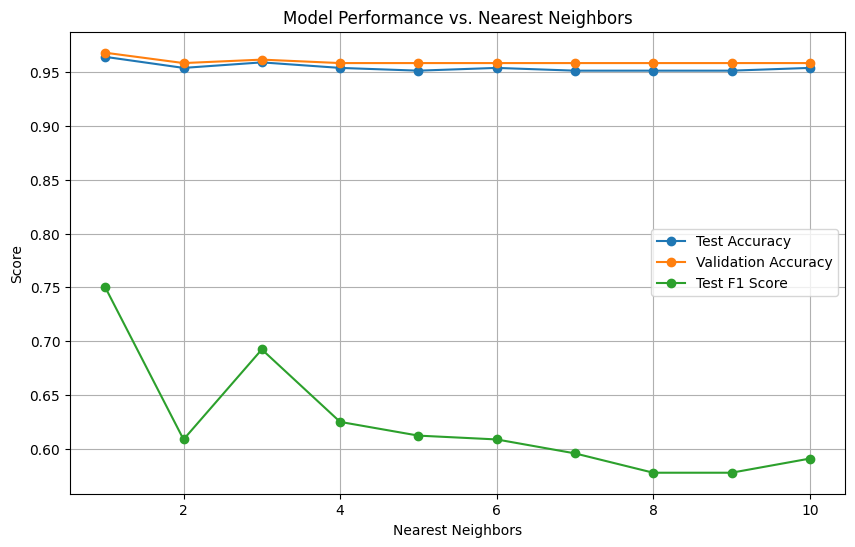

In [ ]:
test_accs = []
val_accs = []
f1s = []
max_depths = [1,2,3,4,5,6,7,8,9,10]

for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_val_pred=knn.predict(X_val)
    y_test_pred=knn.predict(X_test)
    val_accs.append(accuracy_score(y_val, y_val_pred))
    test_accs.append(accuracy_score(y_test, y_test_pred))
    f1s.append(f1_score(y_test, y_test_pred))

print(test_accs)
print(val_accs)
print(f1s)


plt.figure(figsize=(10, 6))
plt.plot(max_depths, test_accs, label='Test Accuracy', marker='o')
plt.plot(max_depths, val_accs, label='Validation Accuracy', marker='o')
plt.plot(max_depths, f1s, label='Test F1 Score', marker='o')


plt.xlabel('Nearest Neighbors')
plt.ylabel('Score')
plt.title('Model Performance vs. Nearest Neighbors')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
results = pd.DataFrame(data = cv_tree.cv_results_)
results = results.drop(columns = ['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'params', 'split0_test_score', 'std_test_score'], axis = 1)
results

,param_max_depth,param_min_samples_leaf,mean_test_score,rank_test_score
0,1,1,0.980769,82
1,1,3,0.980769,82
2,1,4,0.980769,82
3,1,5,0.980769,82
4,1,6,0.980769,82
...,...,...,...,...
105,50,8,0.990385,1
106,50,9,0.990385,1
107,50,10,0.990385,1
108,50,20,0.980769,82


In [ ]:
!pip install graphviz


[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


{'Decision Tree': [0.9897435897435898, 0.967741935483871, 0.9090909090909091, 0.9374999999999999], 'KNN': [0.9487179487179487, 0.3548387096774194, 1.0, 0.5238095238095238], 'Random_Forest': [0.9564102564102565, 0.4838709677419355, 0.9375, 0.6382978723404255]}
val acc: 95.83333333333334
val f1 score: 0.6486486486486487
test acc: 95.64102564102565
test f1 score: 0.6382978723404255
Confusion Matrix:
[[358   1]
 [ 16  15]]


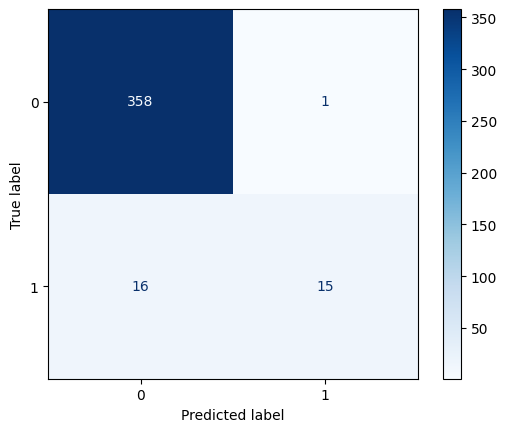

In [ ]:
# RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=2)
random_forest.fit(X_train, y_train)

y_val_pred=random_forest.predict(X_val)
y_test_pred=random_forest.predict(X_test)

add_scores(scores, "Random_Forest", y_test, y_test_pred)
print(scores)

print("val acc: " + str(accuracy_score(y_val, y_val_pred)*100))
print("val f1 score: " + str(f1_score(y_val, y_val_pred)))

print("test acc: " + str(accuracy_score(y_test, y_test_pred)*100))
print("test f1 score: " + str(f1_score(y_test, y_test_pred)))
cm_metric(y_test, y_test_pred)

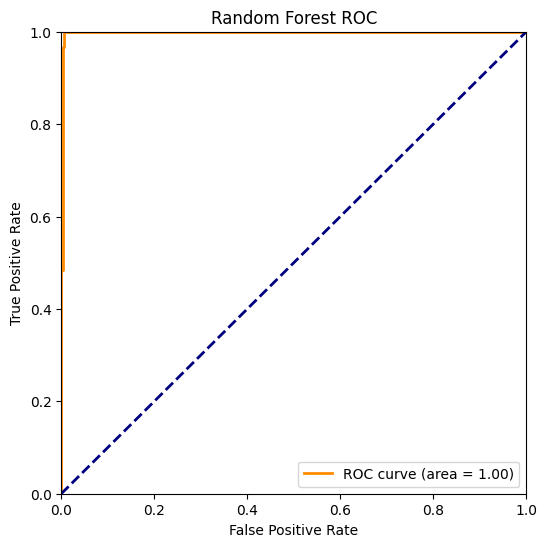

In [ ]:
from sklearn import metrics

### YOUR CODE HERE
y_test_proba = random_forest.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_proba)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt

### YOUR CODE HERE
plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC')
plt.legend(loc="lower right")
plt.show()

[0.9205128205128205, 0.9384615384615385, 0.9461538461538461, 0.9897435897435898, 0.9871794871794872, 0.9923076923076923, 0.9923076923076923, 0.9897435897435898, 0.9871794871794872, 0.9897435897435898]
[0.9230769230769231, 0.9455128205128205, 0.9487179487179487, 0.9903846153846154, 0.9903846153846154, 0.9903846153846154, 0.9903846153846154, 0.9903846153846154, 0.9903846153846154, 0.9903846153846154]
[0.0, 0.3684210526315789, 0.5116279069767442, 0.9374999999999999, 0.923076923076923, 0.9538461538461539, 0.9538461538461539, 0.9374999999999999, 0.9206349206349206, 0.9374999999999999]


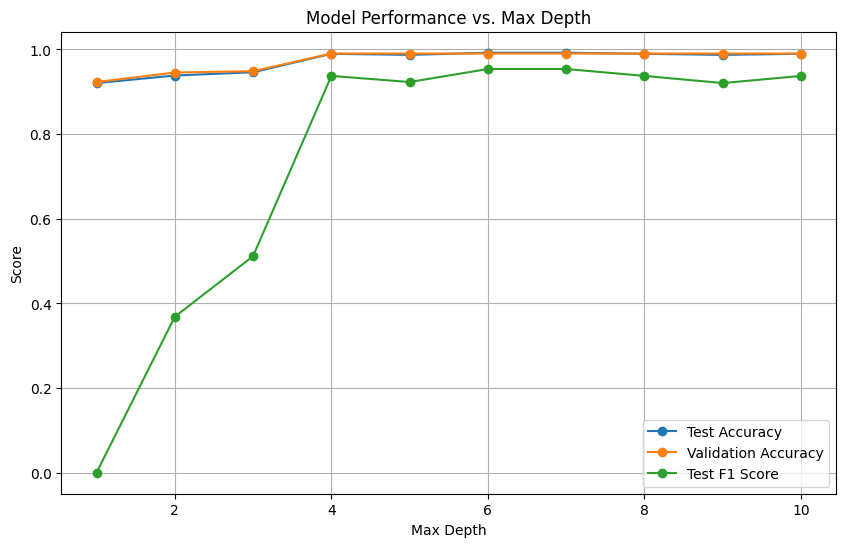

In [ ]:
test_accs = []
val_accs = []
f1s = []
max_depths = [1,2,3,4,5,6,7,8,9,10]
#n_estimators=100
for k in range(1,11):
    #random_forest = RandomForestClassifier(random_state=0,  n_estimators = 10, max_depth=k)
    random_forest = RandomForestClassifier(random_state=10,  n_estimators = 14, max_depth=k)
    random_forest.fit(X_train, y_train)
    y_val_pred=random_forest.predict(X_val)
    y_test_pred=random_forest.predict(X_test)
    val_accs.append(accuracy_score(y_val, y_val_pred))
    test_accs.append(accuracy_score(y_test, y_test_pred))
    f1s.append(f1_score(y_test, y_test_pred))

print(test_accs)
print(val_accs)
print(f1s)


plt.figure(figsize=(10, 6))
plt.plot(max_depths, test_accs, label='Test Accuracy', marker='o')
plt.plot(max_depths, val_accs, label='Validation Accuracy', marker='o')
plt.plot(max_depths, f1s, label='Test F1 Score', marker='o')


plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.title('Model Performance vs. Max Depth')
plt.legend()
plt.grid(True)
plt.show()

{'Decision Tree': [0.9897435897435898, 0.967741935483871, 0.9090909090909091, 0.9374999999999999], 'KNN': [0.9487179487179487, 0.3548387096774194, 1.0, 0.5238095238095238], 'Random_Forest': [0.9564102564102565, 0.4838709677419355, 0.9375, 0.6382978723404255], 'Logistic Regression': [0.9538461538461539, 0.4838709677419355, 0.8823529411764706, 0.625]}
val acc: 95.83333333333334
val f1 score: 0.6285714285714286
test acc: 95.38461538461539
test f1 score: 0.625
Confusion Matrix:
[[357   2]
 [ 16  15]]


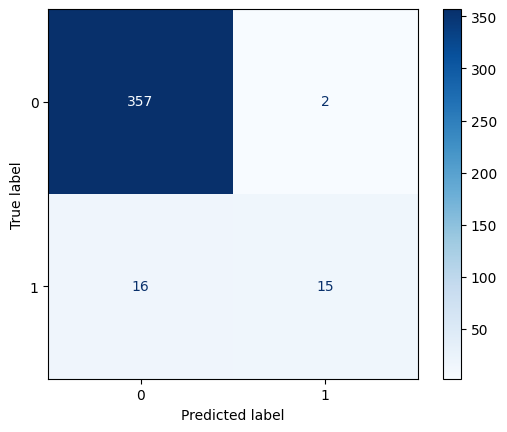

In [ ]:
# LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=0, max_iter=3000)
logreg.fit(X_train, y_train)

y_val_pred=logreg.predict(X_val)
y_test_pred=logreg.predict(X_test)

add_scores(scores, "Logistic Regression", y_test, y_test_pred)
print(scores)

print("val acc: " + str(accuracy_score(y_val, y_val_pred)*100))
print("val f1 score: " + str(f1_score(y_val, y_val_pred)))
print("test acc: " + str(accuracy_score(y_test, y_test_pred)*100))
print("test f1 score: " + str(f1_score(y_test, y_test_pred)))
cm_metric(y_test, y_test_pred)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
{'Decision Tree': [0.9897435897435898, 0.967741935483871, 0.9090909090909091, 0.9374999999999999], 'KNN': [0.9487179487179487, 0.3548387096774194, 1.0, 0.5238095238095238], 'Random_Forest': [0.9564102564102565, 0.4838709677419355, 0.9375, 0.6382978723404255], 'Logistic Regression': [0.9538461538461539, 0.4838709677419355, 0.8823529411764706, 0.625], 'SVM': [0.9205128205128205, 0.0, 0.0, 0.0]}
val acc: 92.3076923076923
val f1 score: 0.0
test acc: 92.05128205128204
test f1 score: 0.0
Confusion Matrix:
[[359   0]
 [ 31   0]]


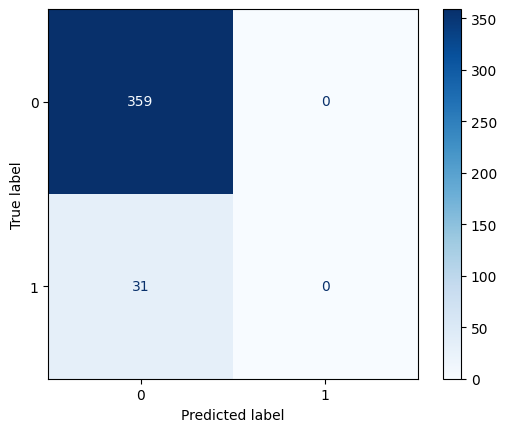

In [ ]:
# SVM
from sklearn.svm import SVC

svm = SVC(gamma=0.1, C=1, random_state=0)
svm.fit(X_train, y_train)

y_val_pred=svm.predict(X_val)
y_test_pred=svm.predict(X_test)

add_scores(scores, "SVM", y_test, y_test_pred)
print(scores)

print("val acc: " + str(accuracy_score(y_val, y_val_pred)*100))
print("val f1 score: " + str(f1_score(y_val, y_val_pred)))
print("test acc: " + str(accuracy_score(y_test, y_test_pred)*100))
print("test f1 score: " + str(f1_score(y_test, y_test_pred)))
cm_metric(y_test, y_test_pred)

Fantastic, we have just built a decision tree! Let's go see how well it performs.

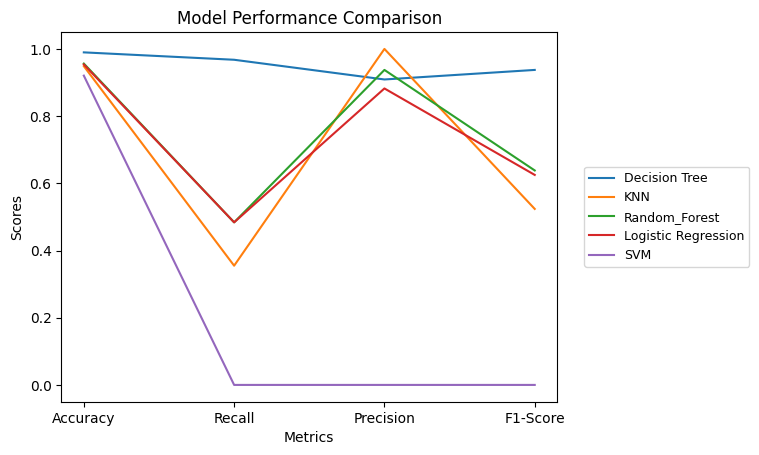

In [ ]:
# PLOT GRAPHS
x = ["Accuracy", "Recall", "Precision", "F1-Score"]
models = scores.keys()

for model in models:
    y = scores[model]
    plt.plot(x, y, label=model)

plt.legend(bbox_to_anchor=(1.4, 0.5), loc = "center right", fontsize=9)
plt.title("Model Performance Comparison")
plt.xlabel("Metrics")
plt.ylabel("Scores")

plt.show()

## Submitting your model

Once you believe to have found the best classifier, run your classifier on the test data and make a `.pkl` file containing your predictions in a Pandas DataFrame.

This DataFrame will contain 3 columns for your binary classifier (or 5 columns for the multiclass classifier): the first column should be your model's "best guess" for each patient (either 0 or 1, negative or positive) and the last two columns should be the probability the patient would be classified as either a 0 or 1.

Here is an example:
|   | Prediction | 0 | 1   |
|---|---|---|------|
| 0 | 0 | $p_{0,0}$ | $p_{0,1}$|
| 1 | 1 | $p_{1,0}$ | $p_{1,1}$|
| 2 | 1 | $p_{2,0}$ | $p_{2,1}$|
| ... | ... | ... | ...|
| N | 0 | $p_{N,0}$ | $p_{N,1}$|

where $p_{i,j}$ corresponds to the probability of data point $i$ belonging to class $j$.

Here's an example of pickling a DataFrame (saving a `.pkl` file):

In [ ]:
# After running this cell, you should see the pkl file pop up in the file explorer to the left
# Use the three dots next to the filename to download the file
# After downloading the pkl file, email it to the Medlytics staff email

import pickle

final_pred = decision_tree.predict(test_data)
final_proba = decision_tree.predict_proba(test_data)

predictions = pd.DataFrame({"guesses":final_pred,"prob_neg":final_proba[:,0],"prob_pos":final_proba[:,1]})
prediction_pickle_path = 'team3_week1_v2.pkl'

# Create a variable to pickle and open it in write mode
prediction_pickle = open(prediction_pickle_path, 'wb')
pickle.dump(predictions, prediction_pickle)

prediction_pickle.close()

In [ ]:
prediction_unpickle = open(prediction_pickle_path, 'rb')

# Load the unpickled object into a variable
predictions = pickle.load(prediction_unpickle)

print(predictions)

     guesses  prob_neg  prob_pos
0          0       1.0       0.0
1          0       1.0       0.0
2          0       1.0       0.0
3          0       1.0       0.0
4          0       1.0       0.0
..       ...       ...       ...
967        0       1.0       0.0
968        0       1.0       0.0
969        0       1.0       0.0
970        0       1.0       0.0
971        0       1.0       0.0

[972 rows x 3 columns]


We will compare your predictions with the true classifications to score your model.

Let's check our full path to see where the pkl file was saved:

In [ ]:
pwd

'/datasets/_deepnote_work'

## Scoring your model

Navigate to Week 1 in the Medlytics challenge project [**evaluator app**](https://medlytics-evaluator.streamlit.app/) to score your model. (Wake it up if it's asleep!)

#### Modeling considerations:
- You will receive a certain number of points for each correct classification and a certain point penalty for each incorrect classification. The points are weighted and designed to equate to -1 in a Zero Rule baseline model. This point scheme is designed to punish you heavily for predicting false positives (FP) and false negatives (FN)—FN cases especially. In doing so, we hope you see the importance of **clinical considerations** and treat your models from a more **human perspective**, rather than be detached from it.
- Similar to the confusion matrix, we want you to keep in mind the other aspects of healthcare analytics—in this case, **economic feasibility**. In essence, we want you to minimize the amount of time and money spent on data collection by reducing the number of features collected. Each record certainly required a lot of time and money from several individuals and businesses to reliably create, and we hope you gain a better understanding of conducting a useful cost-benefit analysis with this scoring method. The full details of the weighted features can be found in the GitHub.

## Presenting your model

Finally, we would like you to be able to present your model to the class. Prepare a presentation with the following things:

* **Features Chosen:** a list of the features used in your model, and an explanation of how you chose them.
* **Type of Model:** an explanation of the model type, parameters used, and why.
* **Evaluation:** at least one plot showing an evaluation of your model against a validation set. You can use a confusion matrix, AUROC, and/or another metric of your choice.

Feel free to include one or two additional plots that describe your process and/or model if you think that would be helpful.

## Moving to the next level

For those who finish early, remember how I converted the class values into simply "negative" and "positive"? Now try tackling the **multiclass** classifier (predicting the different types of positive hypothyroid cases instead of simply negative or positive)!

The same rules apply! (Note: for the multiclass problem, the AUROC calculation will be the micro-average over your classes.)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5c1a26d2-9058-48dd-ab0e-a86bc5f1476a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>